# Unraveling Real Estate Market Dynamics using Time Series Modeling

![Image](images/housing.png "Real Estate Housing Image")



## Group Members:
1. Fanice Andayi
2. Hanan Maalim 
3. Kenneth Gakuru 
4. Josphat Kimani
5. Mahmoud Yuna 
6. Kevin Riungu
7. Cynthia Chelangat

## A)INTRODUCTION

The real estate market presents a dynamic and complex investment landscape, where the value of investments can significantly impact the financial well-being of investors. Identifying lucrative investment opportunities requires analyzing vast amounts of historical data to predict future trends. This task becomes even more challenging with the inherent volatility and regional diversity of the real estate market. Investors seek to maximize returns while managing the risks associated with market fluctuations and regional economic changes.

## B)PROBLEM STATEMENT

**What is the prevailing circumstance?**

The real estate investment firm faces the challenge of accurately forecasting prices across various zip codes while considering factors like profit margins, risk, and investment horizons. The complexity of real estate markets adds to the difficulty of identifying the best investment opportunities.

**What problem is trying to be solve?**

The project aims to address the uncertainty surrounding real estate investments by leveraging time series modeling techniques. The goal is to provide the firm with insights into which zip codes offer the best potential for high returns on investment, considering both profitability and risk.

**How the project aims to solve the problem?**

Through the analysis of historical data and the application of time series modeling, the project seeks to forecast real estate prices and identify trends and patterns that can guide investment decisions. By considering metrics beyond profit margins, such as risk and ROI yield, the project aims to assist the firm in making well-informed and balanced investment choices amidst the complexity of the real estate market.


## C)OBJECTIVES

**Main Objective:**

The main objective of this project is to utilize time series modeling techniques to forecast real estate prices across various zip codes. By doing so, the project aims to provide the investment firm with valuable insights into which zip codes offer the most promising opportunities for high returns on investment, while also considering factors like risk and investment horizons.

**Specific Objectives:**

1. To develop time series models capable of accurately forecasting real estate prices for different zip codes.

2. To provide the investment firm with actionable recommendations regarding the top 5 zip codes for investment, supported by the rationale derived from the time series analysis.

3. To consider additional metrics beyond profit margins, including risk assessment, to ensure well-informed and balanced investment decisions.

## D)NOTEBOOK STRUCTURE

1.Business Understanding

2.Data Understandiing

3.Data Cleaning

4.Exploratory Data Analysis

5.Data Preparation

6.Modelling

7.Evaluation

8.Conclusion ,Recommendations and Nextsteps.


### 1.BUSINESS UNDERSTANDING

*Stakeholder Identification:*

The primary stakeholder in this project is a fictional real-estate investment firm focused on identifying the top 5 zip codes for real estate investment. This firm represents investors aiming to optimize their investment portfolio's performance by selecting regions with the highest potential for growth and stability. Secondary stakeholders include market analysts, financial advisors, and individual investors who rely on precise market forecasts to make informed decisions.

*Project Value:*

This project addresses the real-world problem of optimizing real estate investments by developing a time series model to forecast the future prices of real estate in different zip codes. By leveraging the Zillow Research dataset, the project aims to:
- Provide a data-driven basis for investment decisions.
- Identify zip codes with the highest potential for appreciation, thereby maximizing ROI.
- Offer insights into market trends, enabling stakeholders to manage risks better and align investments with long-term financial goals.

*How Stakeholders Will Use the Project:*

The real-estate investment firm will use the project's findings to strategize their investment portfolio, focusing on zip codes identified as having the best investment potential. Market analysts and financial advisors can leverage the insights to advise their clients on real estate investments. Individual investors, in turn, can use the recommendations to make informed decisions about where to invest their money within the real estate market.


*Metric of Success*

In the analysis of time series, the criterion for assessing the suitability of models will be the Mean Absolute Percentage Error (MAPE). This metric is selected because it calculates errors as a percentage of the actual values, thus giving a weighted measure of the inaccuracies. This approach is advantageous, especially in managing outliers, since errors are normalized by the true values. Unlike the Root Mean Square Error (RMSE), which simply subtracts predicted values from actual ones without accounting for the scale of the data, MAPE ensures that outliers do not disproportionately affect the perception of the model's accuracy.

In [189]:
# importing relevant libraries

# Analysis libraries
import pandas as pd 
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Warning libraries
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings('ignore')

# Modelling libraries
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

import pmdarima as pm #a library to help with auto_arima
import itertools

# Metrics Libraries
from sklearn.metrics import mean_absolute_percentage_error

from prophet import Prophet

### 2.DATA UNDERSTANDING

|Dataset columns|Column Description|Data type|
|:---|:---|---|
|RegionID|Represents a unique ID for each region.|integer (int64)|
|RegionName|Represents the name of the region/ also the zipcode|integer (int64)|
|City|Represents the city where the region is located.|	string (object)|
|State|	Represents the state where the region is located.|	string (object)|
|Metro|	Represents the metropolitan area where the region is located (if applicable).|	string (object)|
|CountyName|Represents the name of the county where the region is located.|string (object)|
|SizeRank|Represents the relative size of the region compared to other regions in the dataset.|	integer (int64)|
|1996 upto 2018|Represents the median home price for the region in months and years	|float (float64)|


*Data Source and Suitability:*

The dataset is sourced from Zillow Research, a reputable provider of historical real estate market data. It encompasses historical home values across various zip codes in the United States, spanning from April 1996 to April 2018. This dataset is particularly suited for the project due to its comprehensive coverage of the real estate market over two decades, offering a rich foundation for analyzing trends, forecasting future real estate prices, and identifying promising investment opportunities.

*Dataset Properties:*

- *Size of the Dataset*: The dataset consists of 14,723 entries (rows) and 272 columns. Each entry represents a unique zip code.
- *Features*: Besides geographical identifiers like RegionID, RegionName (zip code), City, State, Metro, and CountyName, the dataset features monthly home values from April 1996 (1996-04) to April 2018 (2018-04).
- *Descriptive Statistics*: The dataset exhibits a wide range of home values, reflecting the diversity of the U.S. real estate market. The presence of various geographical identifiers supports granular analysis by location.

*Relevance for the Project:*

The temporal nature of the dataset, with over two decades of monthly home values, makes it highly relevant for time series analysis. This analysis can uncover trends, seasonality, and growth patterns, crucial for predicting future values and identifying the best zip codes for investment. The inclusion of geographical identifiers allows for localized analysis, aligning with the project's goal to recommend specific zip codes for investment.

*Feature Justification:*

- *Temporal Features*: Monthly home value columns are directly relevant for time series forecasting, enabling the identification of long-term trends and cyclical patterns.
- *Geographical Features*: Identifiers like RegionName, City, and State are essential for localizing the analysis to specific markets, a key requirement for providing targeted investment recommendations.



In [190]:
# loading the dataset
df = pd.read_csv('data & reports/zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,

In [191]:
df.tail()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,93700.0,93400.0,93200.0,93000.0,92900.0,92700.0,92600.0,92600.0,92600.0,92800.0,93100.0,93500.0,94000.0,94500.0,95100.0,95800.0,96500.0,97100.0,97800.0,98500.0,99200.0,100000.0,100800.0,101700.0,102600.0,103400.0,104200.0,104900.0,105600.0,106300.0,106800.0,107300.0,107800.0,108400.0,109000.0,109600.0,110200.0,110800.0,111400.0,112000.0,112600.0,113000.0,113500.0,113900.0,114300.0,114800.0,115400.0,116000.0,116700.0,117400.0,118100.0,118700.0,119500.0,120100.0,120600.0,121100.0,121700.0,122400.0,123300.0,124200.0,125300.0,126300.0,127400.0,128500.0,129600.0,130600.0,131400.0,132100.0,133000.0,133900.0,134900.0,136000.0,137200.0,138500.0,139700.0,140900.0,141900.0,143600.0,146300.0,149100.0,150900.0,151800.0,152000.0,151700.0,151700.0,152500.0,154200.0,156700.0,159800.0,163000.0,166000.0,168700.0,171400.0,174100.0,176800.0,179200.0,180800.0,181800.0,182400.0,182800.0,183200.0,183700.0,184300.0,185400.0,187300.0,190000.0,193400.0,197200.0,200600.0,203100.0,204400.0,205000.0,205300.0,205400.0,205500.0,205300.0,205100.0,204800.0,204800.0,204900.0,205200.0,205700.0,206200.0,206500.0,206500.0,206300.0,206100.0,205900.0,205600.0,205000.0,204100.0,202900.0,201600.0,200200.0,198900.0,197800.0,197100.0,196900.0,197300.0,197900.0,198100.0,197800.0,197200.0,196400.0,195600.0,194600.0,193400.0,192200.0,191300.0,190800.0,190700.0,190500.0,189800.0,188700.0,187500.0,186700.0,186600.0,187100.0,187300.0,187500.0,187700.0,188200.0,189000.0,190100.0,190200.0,188500.0,186200.0,184400.0,184400.0,185900.0,188000.0,188900.0,188900.0,187600.0,183700.0,177100.0,173200.0,173000.0,174700.0,176200.0,176300.0,174700.0,174000.0,174800.0,175800.0,175500.0,174600.0,174700.0,175200.0,175400.0,175200.0,175300.0,174500.0,173100.0,172700.0,1732

In [192]:
df.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

In [193]:
df.shape

(14723, 272)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [195]:
df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.380500e+04,1.380500e+04,1.380500e+04,1.380500e+04,1.380500e+04,1.380500e+04,1.383600e+04,1.383600e+04,1.383600e+04,1.383600e+04,1.383600e+04,1.383600e+04,1.385700e+04,1.385700e+04,1.385700e+04,1.385700e+04,1.385700e+04,1.385700e+04,1.390900e+04,1.390900e+04,1.392200e+04,1.392200e+04,1.392200e+04,1.392200e+04,1.400000e+04,1.400000e+04,1.400000e+04,1.400000e+04,1.400000e+04,1.400000e+04,1.405600e+04,1.405600e+04,1.405600e+04,1.405600e+04,1.405600e+04,1.405600e+04,1.408300e+04,1.408300e+04,1.408300e+04,1.408300e+04,1.408300e+04,1.408300e+04,1.410300e+04,1.410300e+04,1.410300e+04,1.410300e+04,1.410300e+04,1.410300e+04,1.411000e+04,1.411000e+04,1.411000e+04,1.411000e+0

In [196]:
df.dtypes

RegionID       int64
RegionName     int64
City          object
State         object
Metro         object
               ...  
2017-12        int64
2018-01        int64
2018-02        int64
2018-03        int64
2018-04        int64
Length: 272, dtype: object

## 3.DATA CLEANING

Data cleaning involves addressing issues related to the quality of the dataset. It aims to ensure that the data is accurate, consistent, and free from errors. Here are some data cleaning methods engaged in:



####  a) Checking for validity of data 

The RegionName contains zipcode data. It will be renamed to Zipcode.


In [197]:
# Rename RegionName to zipcode

df = df.rename(columns={'RegionName': 'Zipcode'})
df.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,787

#### b)Checking for missing values

In [198]:
# Check for null values 

print(f'The data has {df.isna().sum().sum()} missing values')

The data has 157934 missing values


In [199]:
# Define a function to explore missing data
def missing_data(df):
    missing_data = df.isna().sum()
    missing_data = missing_data[missing_data>0]
    return missing_data.to_frame()

In [200]:
# expanding the number of visible columns
pd.set_option('display.max_columns', None)

In [201]:
# Apply missing_data function to the dataframe
missing_data(df).T

,Metro,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06
0,1043,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1038,1038,1038,1038,1038,1038,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,918,918,918,918,918,918,887,887,887,887,887,887,866,866,866,866,866,866,814,814,801,801,801,801,723,723,723,723,723,723,667,667,667,667,667,667,640,640,640,640,640,640,620,620,620,620,620,620,613,613,613,613,613,613,607,607,607,607,607,607,598,598,598,598,598,598,587,587,587,587,587,587,580,580,580,580,580,580,579,579,349,349,349,349,308,308,308,308,308,308,275,275,275,275,275,275,251,251,251,251,251,251,224,224,224,224,224,224,206,206,206,206,206,206,151,151,151,151,151,151,109,109,109,109,109,109,56,56,56,56,56,56


- The missing values in the date columns will be filled through interpolation (linear).
- The missing values in the metro column will be replaced with 'missing'

In [202]:
# imputing the missing values by replacing them with 'missing'

df.Metro.fillna('missing', inplace=True)


In [203]:
# interpolate missing values on date columns
df.interpolate(inplace=True)


In [204]:
# checking to see if missing values have been replaced

print(f'The data has {df.isna().sum().sum()} missing values')

The data has 0 missing values


### c)Checking for duplicates

In [205]:
# checking for duplicates

print(f'The data has {df.duplicated().sum()} duplicates')

The data has 0 duplicates


#### d)Inspecting the zipcode column

In [206]:
# exploring the datatype of zipcode column

df.dtypes['Zipcode']

dtype('int64')

Zipcodes represent locations and so should be categorical data types. The Zipcode column will be converted from integer to string type.

In [207]:
# Convert all the zipcodes to strings 

df.Zipcode = df.Zipcode.astype('string')
print(df.dtypes["Zipcode"])

string


In [208]:
# exploring the format of the zip codes

print(df.Zipcode.min())
print(df.Zipcode.max())

1001
99901


Some zipcodes have four digits and others five. The column needs to be restructured to ensure all the digits are five in number. The columns with four digits seem to be missing a zero at the beginning.

In [209]:
# The zipcodes need to be 5 digits long, so a zero will be added to the ones that have four digits 

for i in range(len(df)):
    df.Zipcode[i] = df.Zipcode[i].rjust(5, '0')

In [210]:
print(df.Zipcode.min())

01001


### e)Feature Engineering

To solve the problems this, two columns will be created.
- Return on Investment (ROI)

ROI is a measure of returns expected from investments.

- Coefficient of variation (CV)

CV is a measure of the dispersion of data points around the mean and represents the ratio of the standard deviation to the mean. It allows investors to determine how much volatility, or risk, is assumed in comparison to the amount of return expected from investments.



In [211]:
# calculating and creating a new column -ROI
# ROI=( House Price at the Beginning of the Period / House Price at the End of the Period)−1

df['ROI'] = (df['2018-04']/ df['1996-04'])-1

#calculating std to be used to find CV
df["std"] = df.loc[:, "1996-04":"2018-04"].std(skipna=True, axis=1)

#calculating mean to be used to find CV
df["mean"] = df.loc[:, "1996-04":"2018-04"].mean(skipna=True, axis=1)

# calculating and creating a new column - CV

df["CV"] = df['std']/df["mean"]

# dropping std and mean as they are not necessary for analysis

df.drop(["std", "mean"], inplace=True, axis=1)

In [212]:
# Calculating and creating a new column for percentage ROI
df['Percentage_ROI'] = df['ROI'] * 100



In [213]:
df[["Zipcode", "ROI", "CV",'Percentage_ROI']].head()

,Zipcode,ROI,CV,Percentage_ROI
0,60657,2.083782,0.256487,208.378217
1,75070,0.365295,0.152680,36.529487
2,77494,0.567966,0.143950,56.796578
3,60614,1.623971,0.237364,162.397109
4,79936,0.571798,0.178326,57.179819


#### e)Convert the dataset into time series

In [214]:
# Create a copy of the dataset to convert into long view while preserving df as a wide view for EDA
new_df = df.copy()

In [215]:
# creating a function that changes the dataframe structure from wide view to long view

def melt_df(data):
    melted = pd.melt(data, id_vars=['RegionID','Zipcode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 
                                  'ROI','Percentage_ROI', 'CV' ], var_name='Date')
    melted['Date'] = pd.to_datetime(melted['Date'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [216]:
new_df = melt_df(new_df)

In [217]:
# Converting the date data type into date time and indexing

new_df['Date'] = pd.to_datetime(new_df['Date'], format='%m/%y')

# Set the 'Date' column as index

new_df.set_index('Date', inplace=True)

In [218]:
# renaming the column 'value' to 'median_houseprice'

new_df.rename(columns = {"value" : "median_houseprice"}, inplace=True)

In [219]:
# displaying the final cleaned data
new_df.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,ROI,Percentage_ROI,CV,median_houseprice
Date,,,,,,,,,,,
1996-04-01,84654,60657,Chicago,IL,Chicago,Cook,1,2.083782,208.378217,0.256487,334200.0
1996-04-01,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,0.365295,36.529487,0.152680,235700.0
1996-04-01,91982,77494,Katy,TX,Houston,Harris,3,0.567966,56.796578,0.143950,210400.0
1996-04-01,84616,60614,Chicago,IL,Chicago,Cook,4,1.623971,162.397109,0.237364,498100.0
1996-04-01,93144,79936,El Paso,TX,El Paso,El Paso,5,0.571798,57.179819,0.178326,77300.0


### 4.EXPLORATORY DATA ANALYSIS


Exploring the dataset to address the following questions:

1. Top 5 zipcodes with the highest ROI
2. What are the top 10 most popular states?
3. What are the top 10 most popular cities?
4. What is the mean percentage return on investment by zipcode?
5. Which zipcodes have high price volatility?
6.  Does Urbanization Affect Median House Prices? 
7. Which cities fetch the highest median house prices?

In [220]:
# Explore the data information
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3901595 entries, 1996-04-01 to 2018-04-01
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   RegionID           int64  
 1   Zipcode            string 
 2   City               object 
 3   State              object 
 4   Metro              object 
 5   CountyName         object 
 6   SizeRank           int64  
 7   ROI                float64
 8   Percentage_ROI     float64
 9   CV                 float64
 10  median_houseprice  float64
dtypes: float64(4), int64(2), object(4), string(1)
memory usage: 357.2+ MB


The data has ten columns, five of which are numerical and five categorical. 

In [221]:
# exploring the statistics of the data columns 

explore_df = df[['RegionID', 'SizeRank', 'ROI', 'CV']]

explore_df.describe()

,RegionID,SizeRank,ROI,CV
count,14723.000000,14723.000000,14723.000000,14723.000000
mean,81075.010052,7362.000000,1.308045,0.237317
std,31934.118525,4250.308342,1.490612,0.095954
min,58196.000000,1.000000,-0.850937,0.041275
25%,67174.500000,3681.500000,0.739994,0.168237
50%,78007.000000,7362.000000,1.113095,0.228125
75%,90920.500000,11042.500000,1.602578,0.288000
max,753844.000000,14723.000000,101.962601,1.303920


In [222]:
# Define theme colors
theme_colors = ['#1277e1','#ff9900','#f9a603','#0d0079']

# Set the color cycle to use hospital-themed colors
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=theme_colors)

#### a)Top 5 zipcodes with the highest ROI

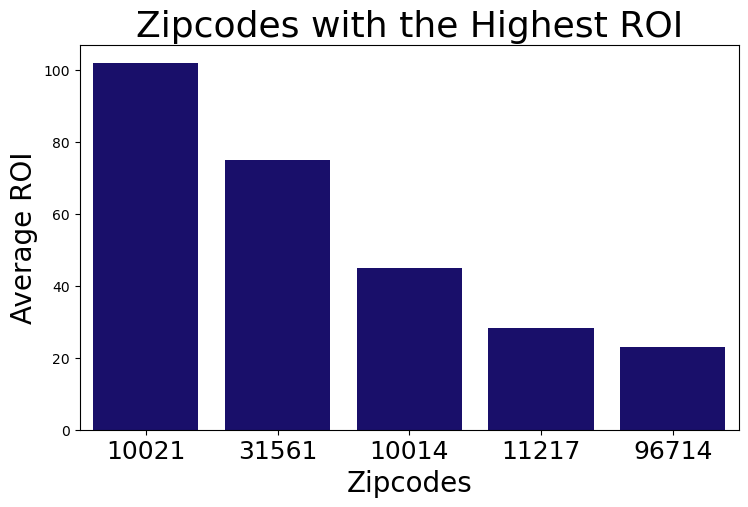

In [287]:


# Calculate the mean ROI for each Zipcode and select the top 5
ROI_topzipcodes = df.groupby("Zipcode")["ROI"].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(8.5, 5))
ax2 = sns.barplot(x=ROI_topzipcodes.index, y=ROI_topzipcodes.values, color='#0d0079')  # Access the first element at index 0
ax2.set_title("Zipcodes with the Highest ROI", fontsize=26)
ax2.set_ylabel("Average ROI", fontsize=20)
ax2.set_xlabel("Zipcodes", fontsize=20)
ax2.tick_params(axis='x', labelsize=18)

# Save the plot as an image
plt.savefig("images/output.jpg")

plt.show()




#### The bar chart displays average ROI for real estate investments across five zip codes, indicating that the 10021 area yields the highest returns, while 96714 offers the lowest.

#### b)What are the top 10 most popular states?

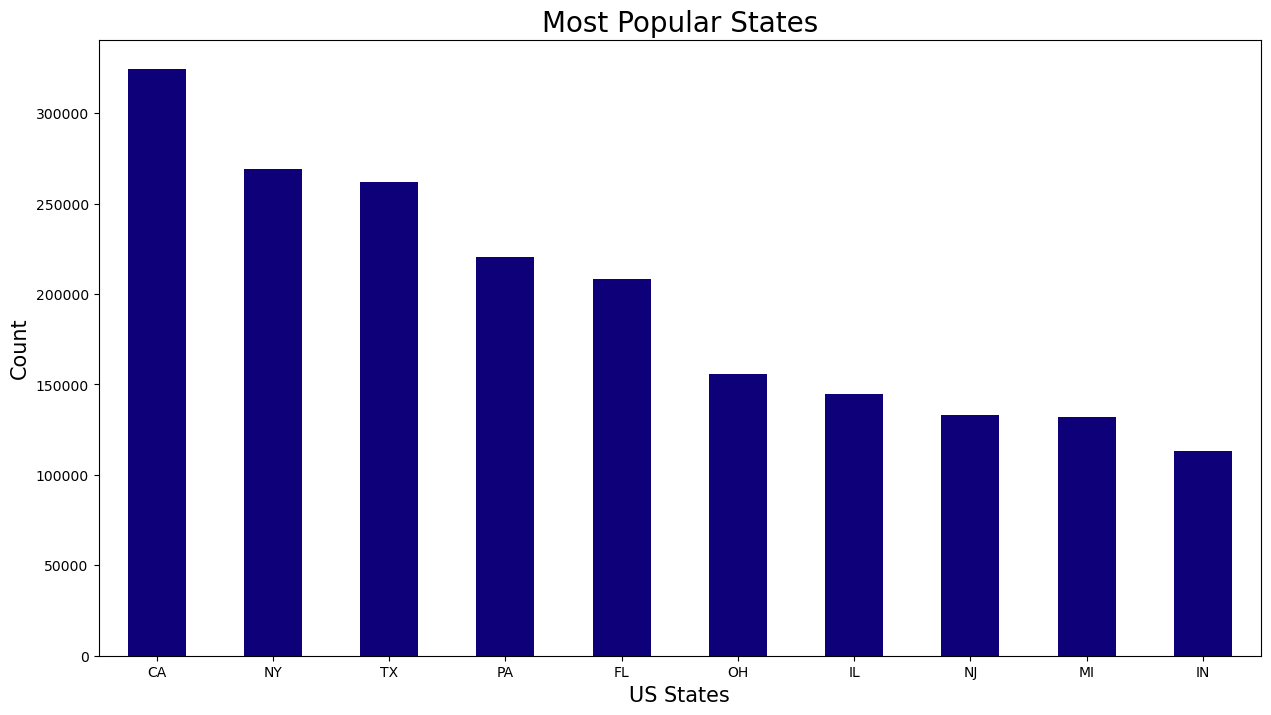

In [224]:
# Plotting the most popular states in the dataset
plt.figure(figsize=(15, 8))
new_df.State.value_counts()[:10].plot(kind="bar", color='#0d0079')
plt.xlabel("US States", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(rotation=0)
plt.title("Most Popular States", fontsize=20)
plt.show()


#### The bar chart ranks US states by popularity, showing California as the most popular, followed by New York and Texas, with Indiana being the least popular among the listed states.

#### C)What are the top 10 most popular cities?

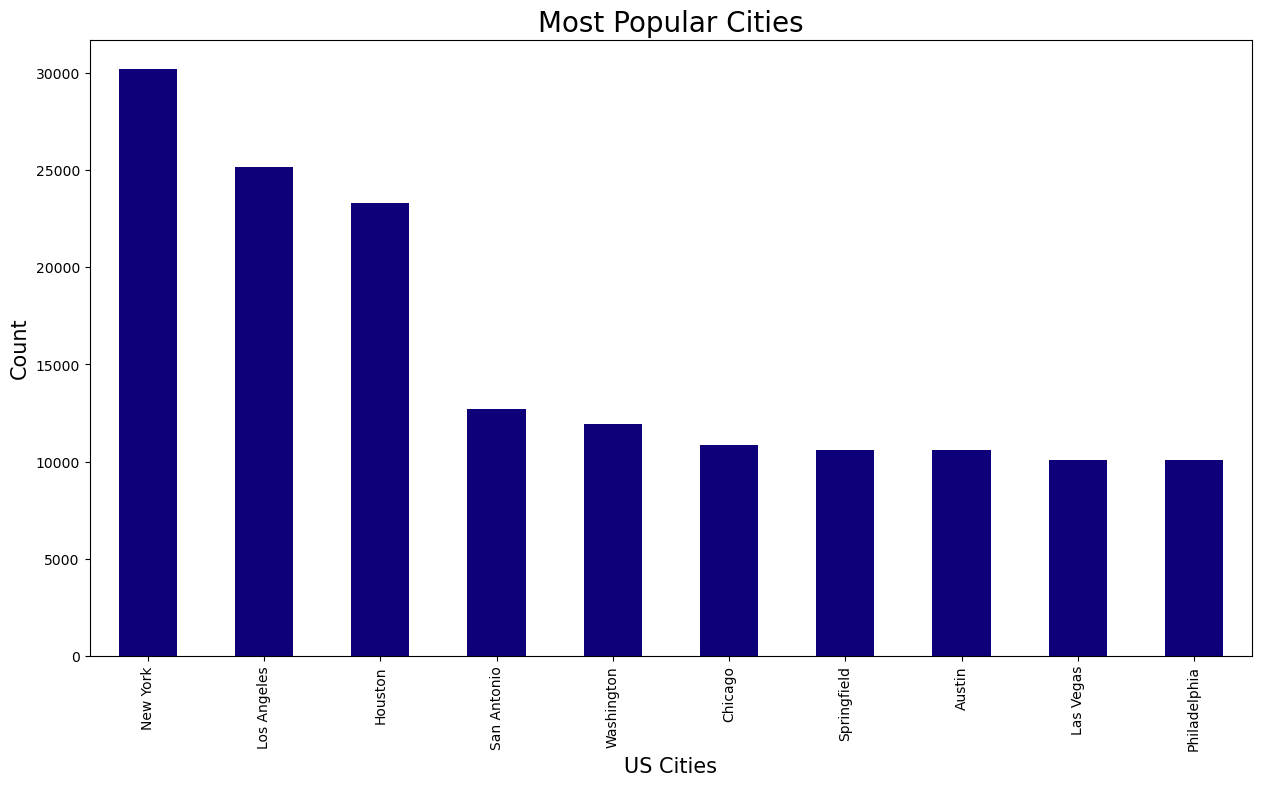

In [225]:
# Plotting the most popular cities in the dataset
plt.figure(figsize=(15, 8))
new_df.City.value_counts()[:10].plot(kind="bar", color='#0d0079')
plt.xlabel("US Cities", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Most Popular Cities", fontsize=20)
plt.show()


#### The bar chart shows a comparison of different US cities by their popularity, with New York being the most popular, followed by Los Angeles and Houston, while Philadelphia appears as the least popular among those listed.

#### d)What is the mean percentage return on investment by zipcode?

In [226]:
# grouping data by mean %ROI and selecting top 30 zipcodes
grouped1 = new_df.groupby('Zipcode')
state_values1 = grouped1['Percentage_ROI'].mean()
state_values_df1 = state_values1.reset_index(name='Percentage_ROI')
state_values_df1 = state_values_df1.sort_values(by='Percentage_ROI', ascending=False)
top_thirty_zipcodes_df_roi = state_values_df1.head(10)

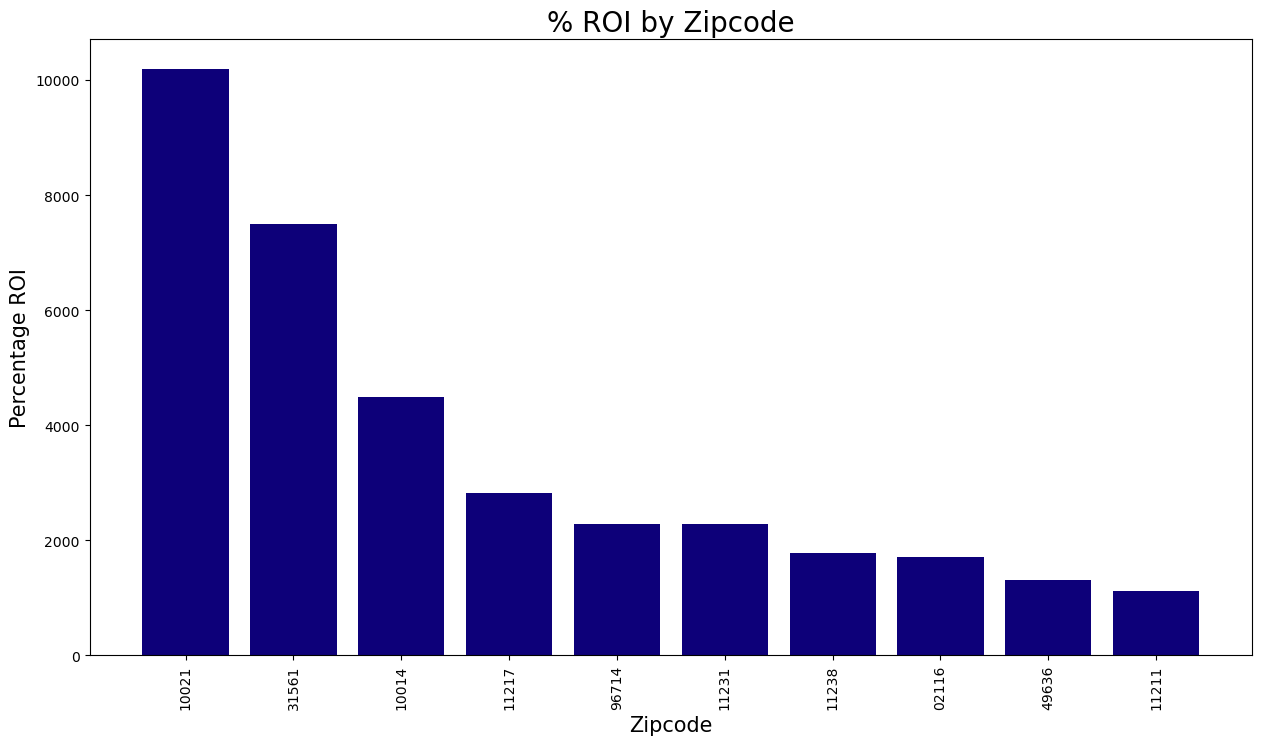

In [227]:
# Plotting the %ROI by zipcode
plt.figure(figsize=(15, 8))
plt.bar(top_thirty_zipcodes_df_roi['Zipcode'], top_thirty_zipcodes_df_roi['Percentage_ROI'], color='#0d0079')
plt.xlabel('Zipcode', fontsize=15)
plt.ylabel('Percentage ROI', fontsize=15)
plt.title('% ROI by Zipcode', fontsize=20)
plt.xticks(rotation=90)
plt.show()


#### This bar chart presents the percentage ROI by zipcode, revealing that the 10021 area has the highest ROI, with a noticeable decrease across the subsequent zip codes listed.

#### e) Which zipcodes have high price volatility?

In [228]:
CV_topzipcodes = pd.DataFrame(df.groupby("Zipcode")["CV"].mean().sort_values(ascending=False).head(5))

In [229]:
ROI_topzipcodes = pd.DataFrame(df.groupby("Zipcode")["ROI"].mean().sort_values(ascending=False).head(5))

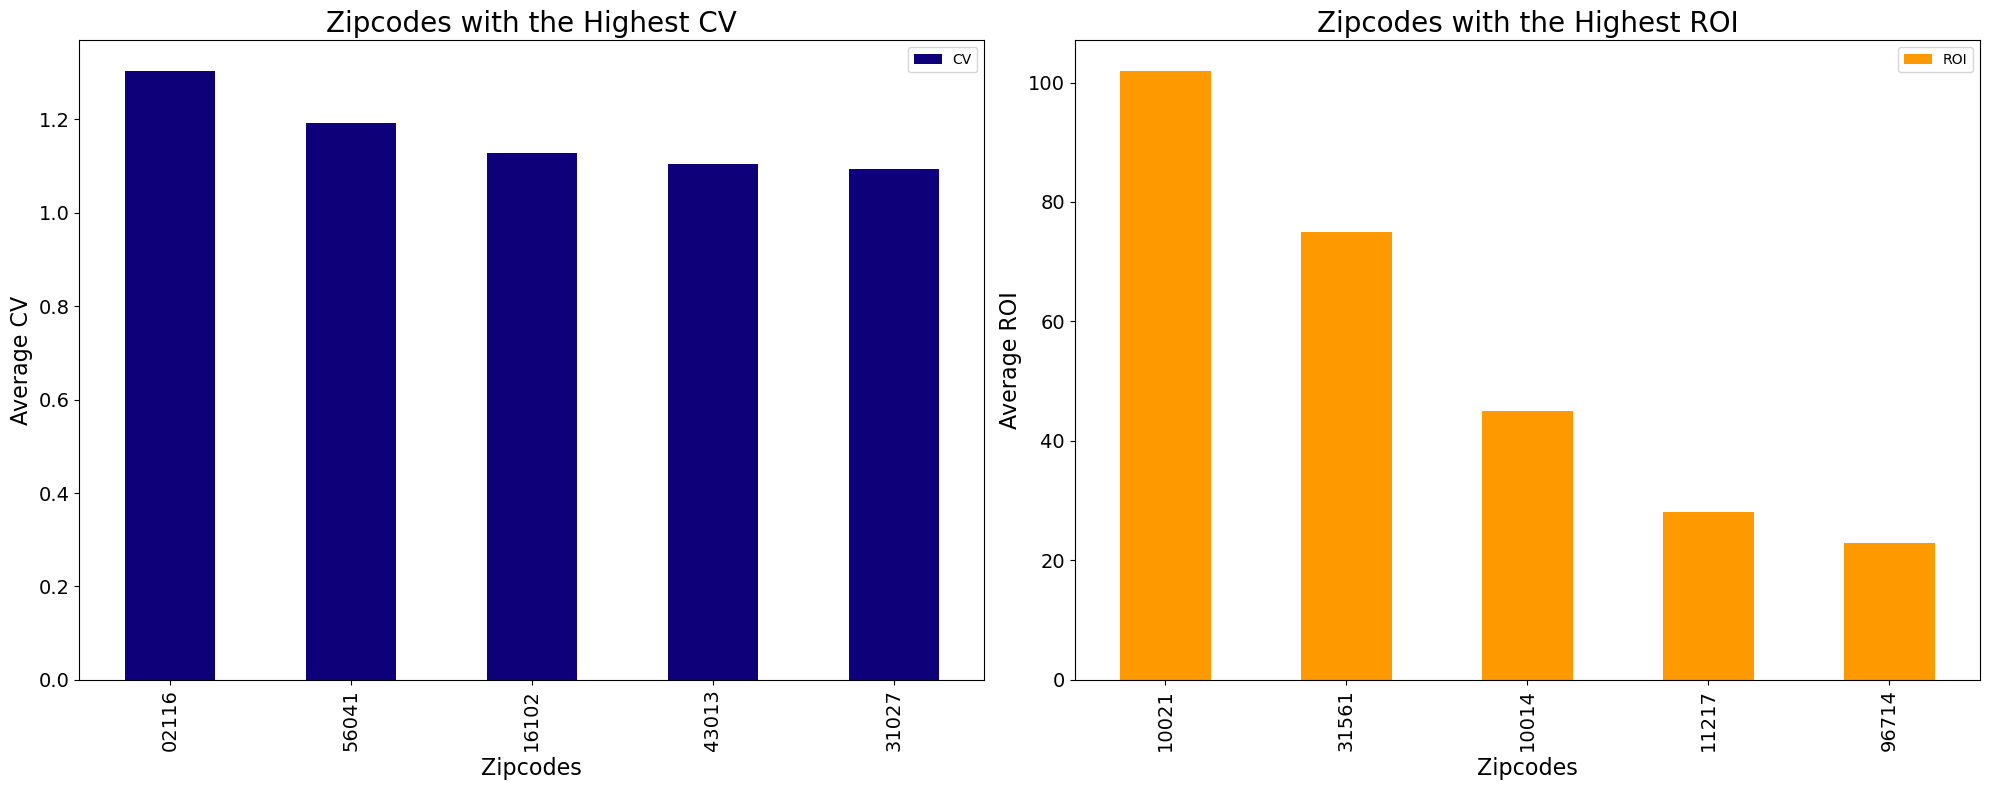

In [230]:

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot CV_topzipcodes
CV_topzipcodes.plot(kind='bar', ax=ax1, color="#0d0079")
ax1.set_title("Zipcodes with the Highest CV", fontsize=20)
ax1.set_ylabel("Average CV", fontsize=16)
ax1.set_xlabel("Zipcodes", fontsize=16)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)

# Plot ROI_topzipcodes
ROI_topzipcodes.plot(kind='bar', ax=ax2, color="#ff9900")
ax2.set_title("Zipcodes with the Highest ROI", fontsize=20)
ax2.set_ylabel("Average ROI", fontsize=16)
ax2.set_xlabel("Zipcodes", fontsize=16)
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)

# Adjust layout
plt.tight_layout()

# Save and show plot
plt.savefig("images\output.jpg")
plt.show()


#### The two bar charts compare zip codes, with one showing those with the highest coefficient of variation (CV) in blue and the other showing those with the highest average return on investment (ROI) in orange, indicating variability and profitability, respectively.

#### f)What is the trend of median houseprices over the years?

In [231]:
#new_df.resample('M', convention='end').asfreq()
resampled = new_df.resample('M', level=0).sum()

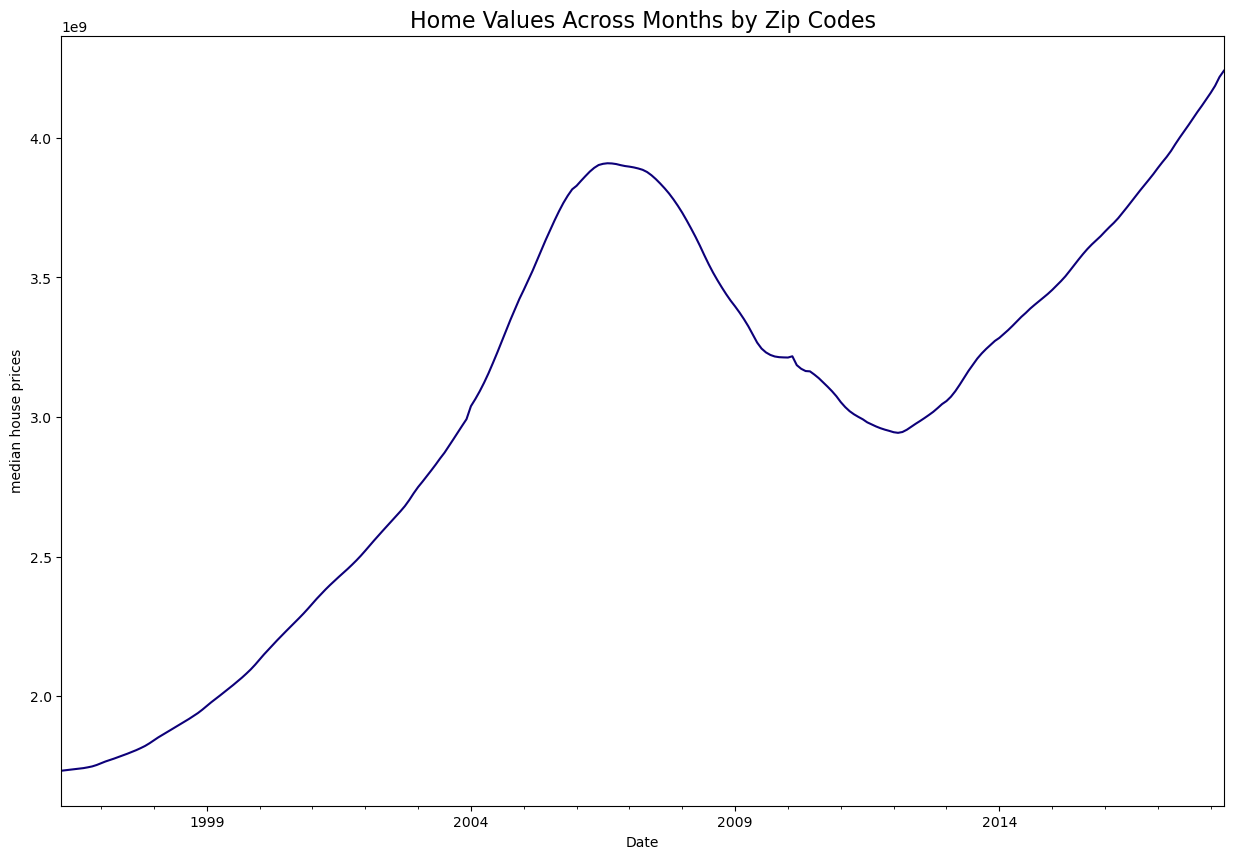

In [232]:
resampled.median_houseprice.plot(figsize=(15,10), color="#0d0079")
plt.title('Home Values Across Months by Zip Codes', fontsize=(16))
plt.ylabel('median house prices')
plt.show()

#### The line graph shows trends in home values across various zip codes over time, with a peak around 2006, a significant dip (Market Crash) around 2008, and a recovery, which can be explained by the global recession that affected the housing market in the US

#### G). Does Urbanization Affect Median House Prices? 
#### H)Which cities fetch the highest median house prices?

In [233]:
# grouping median house prices by size rank

urban_housevalue = pd.DataFrame(new_df.groupby("SizeRank")["median_houseprice"].mean()
                                .sort_values(ascending=False).head(5))

In [234]:
# exploring top ten cities with highest house prices

houseprice_topcities = pd.DataFrame(new_df.groupby("City")["median_houseprice"].mean()
                                    .sort_values(ascending=False).head(5))

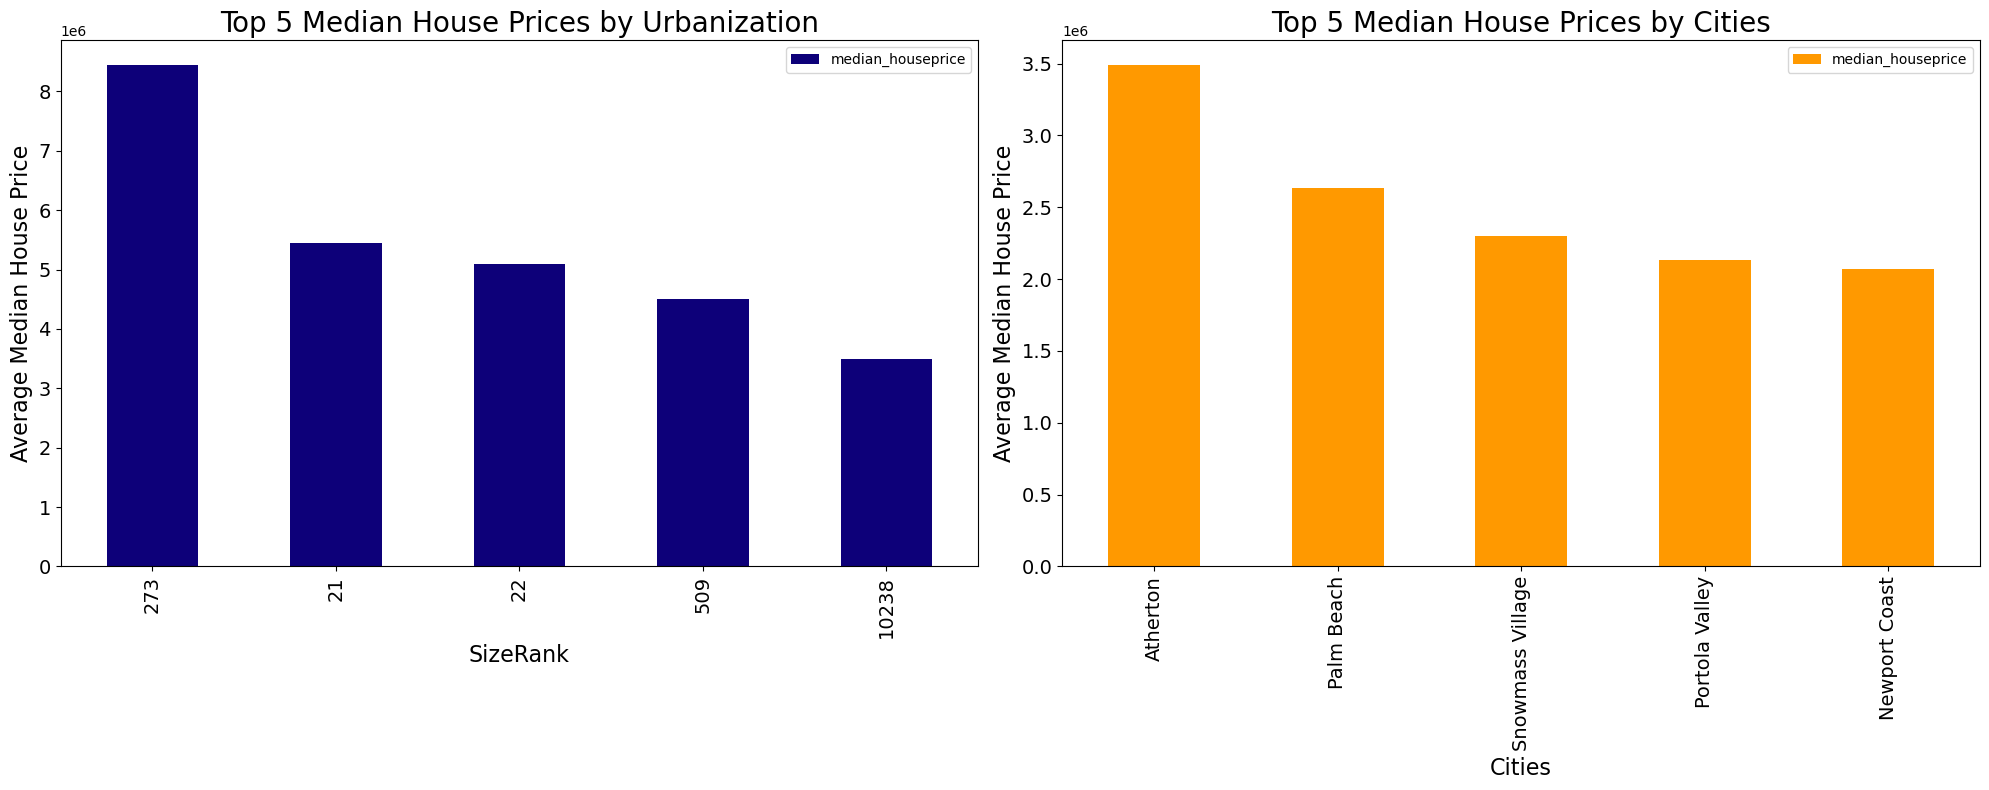

In [235]:


# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot urban_housevalue on the first subplot (ax1)
urban_housevalue.plot(kind='bar', ax=ax1, color="#0d0079")
ax1.set_title("Top 5 Median House Prices by Urbanization", fontsize=20)
ax1.set_ylabel("Average Median House Price", fontsize=16)
ax1.set_xlabel("SizeRank", fontsize=16)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)

# Plot houseprice_topcities on the second subplot (ax2)
houseprice_topcities.plot(kind='bar', ax=ax2, color="#ff9900")
ax2.set_title("Top 5 Median House Prices by Cities", fontsize=20)
ax2.set_ylabel("Average Median House Price", fontsize=16)
ax2.set_xlabel("Cities", fontsize=16)
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)

# Adjust layout
plt.tight_layout()

# Save and show plot
plt.savefig("images\output.jpg")
plt.show()


#### The paired bar charts show the top 5 median house prices, with the first chart categorizing by urbanization level or area size rank in blue, and the second by specific cities in orange, indicating that more urban or specific high-value areas have higher property prices.

 #### I) What is the trend of the Median House prices over the years?

In [236]:
new_df.columns

Index(['RegionID', 'Zipcode', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', 'ROI', 'Percentage_ROI', 'CV', 'median_houseprice'],
      dtype='object')

In [237]:
annual_resampled = new_df.select_dtypes(include=[np.number]).resample('A').mean()
annual_resampled.head()

,RegionID,SizeRank,ROI,Percentage_ROI,CV,median_houseprice
Date,,,,,,
1996-12-31,81075.010052,7362.0,1.308045,130.804476,0.237317,118263.031387
1997-12-31,81075.010052,7362.0,1.308045,130.804476,0.237317,121749.785200
1998-12-31,81075.010052,7362.0,1.308045,130.804476,0.237317,128736.152335
1999-12-31,81075.010052,7362.0,1.308045,130.804476,0.237317,138243.820326
2000-12-31,81075.010052,7362.0,1.308045,130.804476,0.237317,151018.739387


Text(0.5, 0, 'Median House Prices')

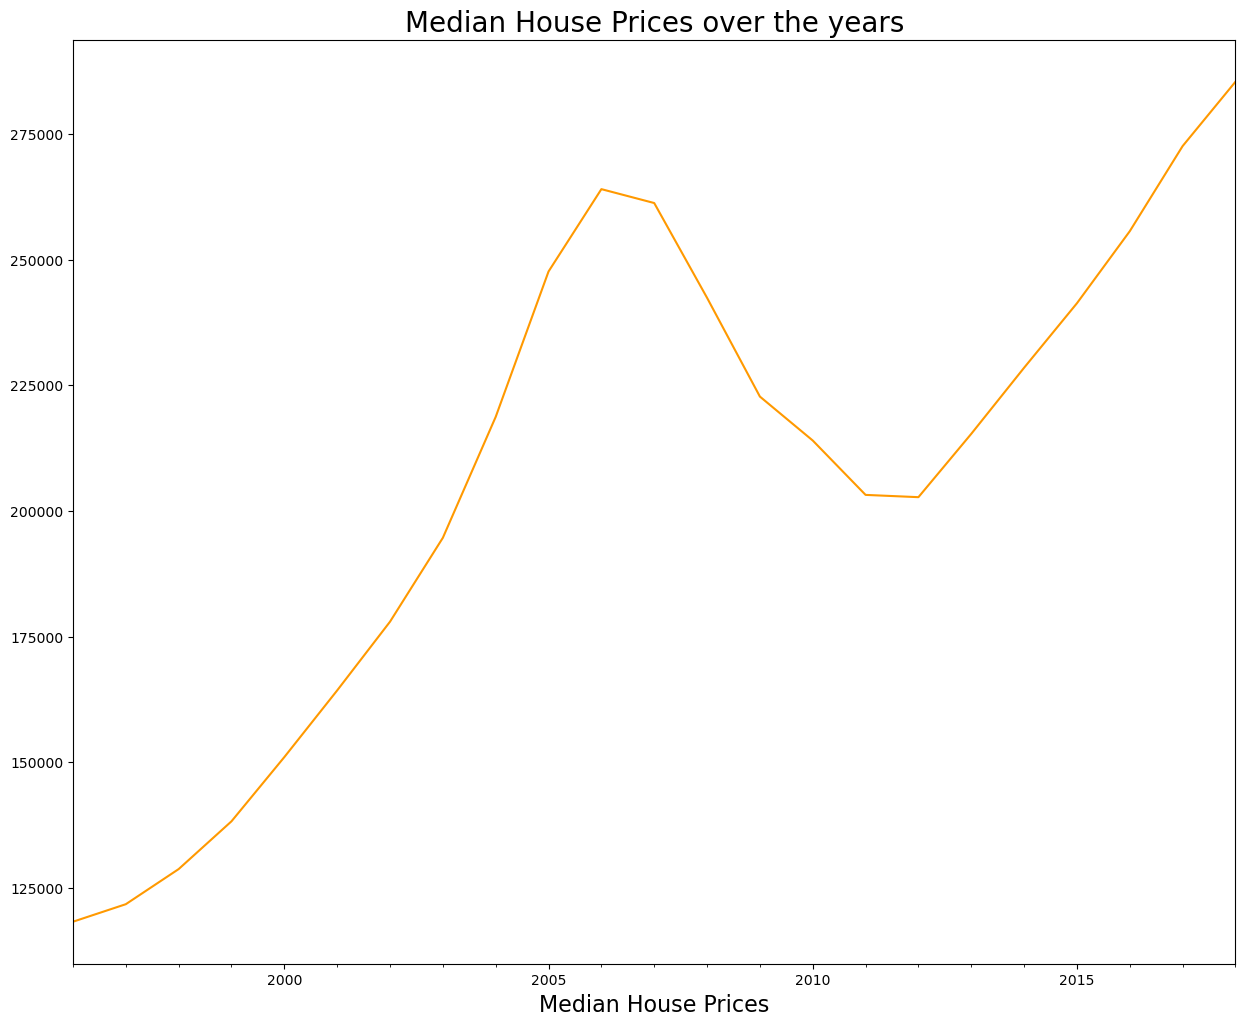

In [238]:
annual_resampled.median_houseprice.plot(figsize=(15, 12), color="#ff9900")
plt.title("Median House Prices over the years", fontsize = 20)
plt.xlabel("Years", fontsize = 16)
plt.xlabel("Median House Prices", fontsize = 16)

#### The line graph shows the trend in median house prices over the years, peaking around 2005, dipping sharply afterwards, and recovering from around 2012 onwards.

__Heat Map__

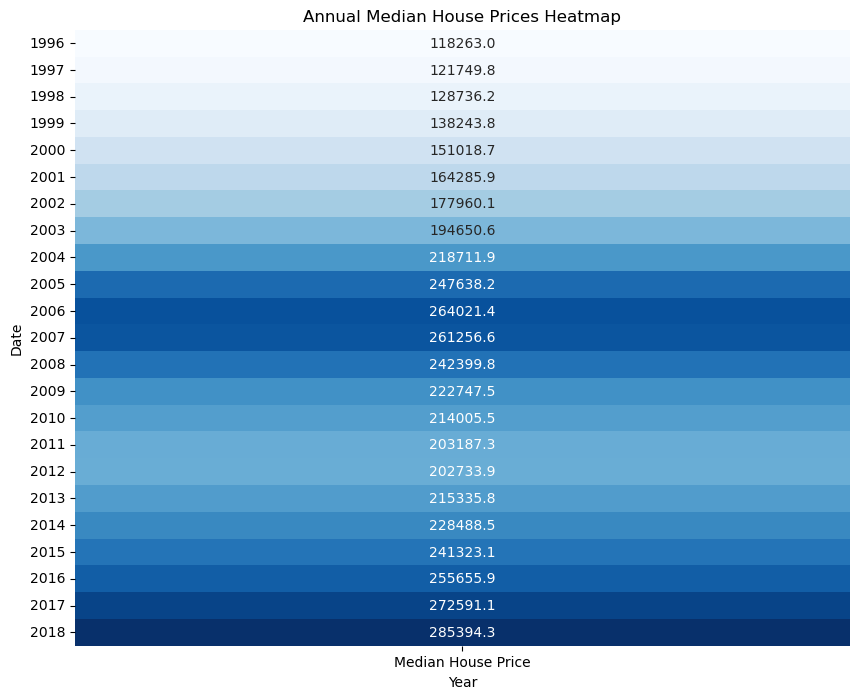

In [239]:
# Ensure that the index is a DateTimeIndex
if not isinstance(annual_resampled.index, pd.DatetimeIndex):
    annual_resampled.index = pd.to_datetime(annual_resampled.index)

# Save the year as an integer in a new column
annual_resampled['Year_Int'] = annual_resampled.index.year

# Change the index to a string representation of the year
annual_resampled.index = annual_resampled.index.strftime('%Y')

# Create a new DataFrame for the heatmap
median_box = annual_resampled["median_houseprice"].to_frame('Median House Price')

# Use Seaborn to draw a heatmap without a color bar
plt.figure(figsize=(10, 8)) 
ax = sns.heatmap(median_box, annot=True, fmt=".1f", cmap='Blues', cbar=False)

# Customize the heatmap
ax.set_title('Annual Median House Prices Heatmap')
ax.set_xlabel('Year') 

# Find the year with the maximum median house price
max_year_int = annual_resampled['Year_Int'].loc[annual_resampled["median_houseprice"].idxmax()]
min_year_int = annual_resampled['Year_Int'].iloc[0]  # First year

# Highlight the cell corresponding to the maximum median house price
highlight_col = max_year_int - min_year_int
ax.add_patch(plt.Rectangle((highlight_col, 0), 1, 1, fill=False, edgecolor='#0d0079', lw=3))

# Show the plot
plt.show()


## 5.DATA PREPROCESSING

In [240]:
new_df.Zipcode.head()

Date
1996-04-01    60657
1996-04-01    75070
1996-04-01    77494
1996-04-01    60614
1996-04-01    79936
Name: Zipcode, dtype: string

In [241]:
new_df.Zipcode.dtype

string[python]

In [242]:
#top 5 zipcodes in terms of ROI
top_5 =['10021','31561','10014','11217','96714']

top5_df = new_df[new_df['Zipcode'].isin(top_5)]
top5_df.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,ROI,Percentage_ROI,CV,median_houseprice
Date,,,,,,,,,,,
1996-04-01,61635,10021,New York,NY,New York,New York,273,101.962601,10196.260069,0.781809,173800.0
1996-04-01,61628,10014,New York,NY,New York,New York,509,44.968702,4496.870190,0.795409,194900.0
1996-04-01,62028,11217,New York,NY,New York,Kings,1535,28.154705,2815.470494,0.793134,125400.0
1996-04-01,98855,96714,Kilauea,HI,Kapaa,Kauai,12848,22.864834,2286.483391,0.703834,43650.0
1996-04-01,71578,31561,Sea Island,GA,Brunswick,Glynn,14623,74.953307,7495.330739,0.836530,32125.0


In [243]:
# Use one of those zipcodes for modelling
z_df = top5_df[top5_df['Zipcode'] =='10021']
z_df.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,ROI,Percentage_ROI,CV,median_houseprice
Date,,,,,,,,,,,
1996-04-01,61635,10021,New York,NY,New York,New York,273,101.962601,10196.260069,0.781809,173800.0
1996-05-01,61635,10021,New York,NY,New York,New York,273,101.962601,10196.260069,0.781809,173850.0
1996-06-01,61635,10021,New York,NY,New York,New York,273,101.962601,10196.260069,0.781809,173850.0
1996-07-01,61635,10021,New York,NY,New York,New York,273,101.962601,10196.260069,0.781809,173850.0
1996-08-01,61635,10021,New York,NY,New York,New York,273,101.962601,10196.260069,0.781809,173900.0


In [244]:
my_series =z_df['median_houseprice']
my_series[:10]

Date
1996-04-01    173800.0
1996-05-01    173850.0
1996-06-01    173850.0
1996-07-01    173850.0
1996-08-01    173900.0
1996-09-01    174100.0
1996-10-01    174450.0
1996-11-01    175050.0
1996-12-01    176000.0
1997-01-01    177250.0
Name: median_houseprice, dtype: float64

## 5.1 Checking for Seasonality

Basically, a time series consists of four components(level,trend,seasonality,residuals). Variation of those components causes the change in the pattern of the time series.If seasonality and trend are part of the time series then there will be effects in the forecast value

In [245]:
def seasonal_decomposition(df):
    decomposition = seasonal_decompose(df)
    
    # Gather the trend, seasonality, and residuals 
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

# Plot gathered statistics
    plt.figure(figsize=(8,8))
    plt.subplot(411)
    plt.plot(df, label='Original', color='blue')
    #plt.plot(ts, label='Original', color='blue')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='blue')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color='blue')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='blue')
    plt.legend(loc='best')
    plt.tight_layout()


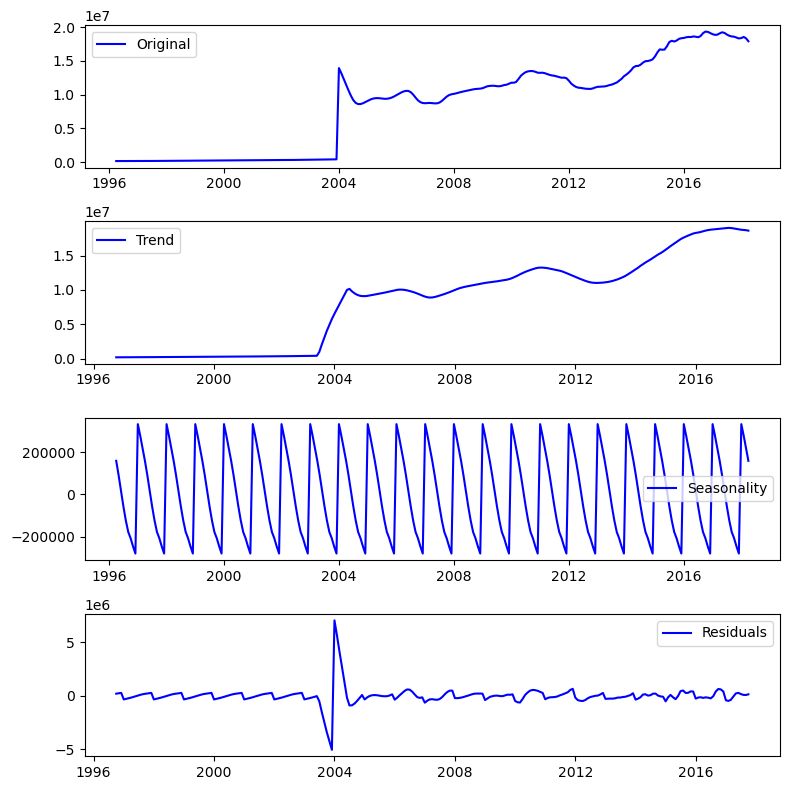

In [246]:
seasonal_decomposition(my_series)

* The straight line from 1996 to 2004 seems like data that was missing and was filled through interpolation,remove this data,since it might give the wrong perception during modelling

In [247]:
#remove data from 1996-2004
series_2 = my_series['2004':]
series_2.head()

Date
2004-01-01    13922800.0
2004-02-01    13140500.0
2004-03-01    12333800.0
2004-04-01    11490700.0
2004-05-01    10641200.0
Name: median_houseprice, dtype: float64

In [248]:
series_2.tail()

Date
2017-12-01    18307100.0
2018-01-01    18365900.0
2018-02-01    18530400.0
2018-03-01    18337700.0
2018-04-01    17894900.0
Name: median_houseprice, dtype: float64

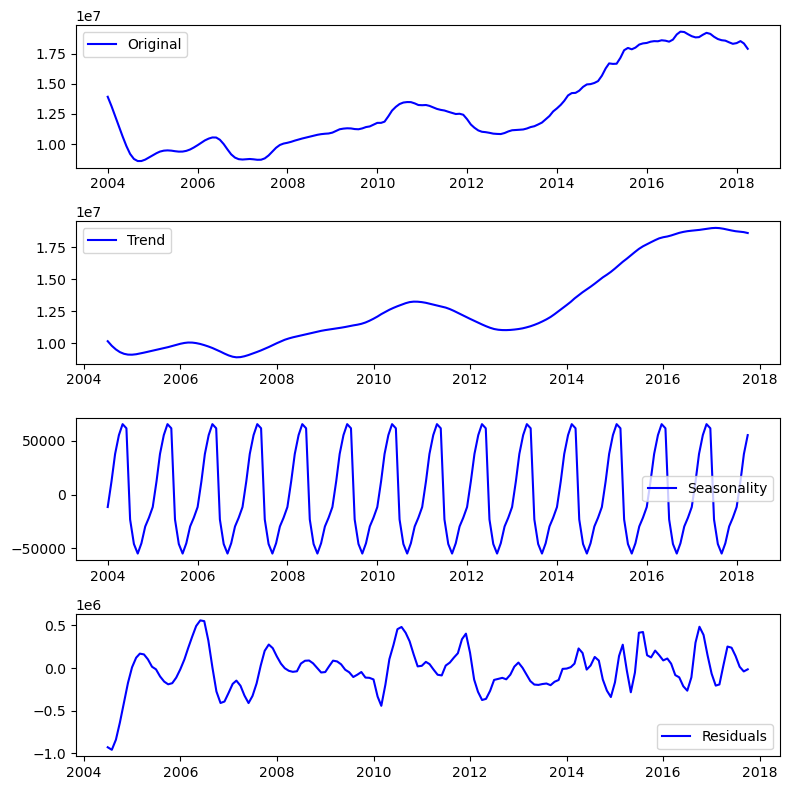

In [249]:
seasonal_decomposition(series_2)

* Now this gives a better view of our series components, with seasonality, trend and residual patterns clearly visible

## 5.2 Checking for Stationarity
 use dickey fuller test to confirm that indeed the data is not stationary

In [250]:
def check_stationarity(df):
    result = adfuller(df)
  
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [251]:
check_stationarity(series_2)

ADF Statistic: -1.488510
p-value: 0.539187
Critical Values:
	1%: -3.473
	5%: -2.880
	10%: -2.577


* The p_value is greater than 0.05, and the test_statistic is also greater than the critical values,therefore we confirm that the time series is not stationary.

## 5.3  Detrending- through differencing

Now, we remove the trend

In [252]:
def detrend(df):
    '''function returns a stationary series'''
    
    diff_series = df.diff(1).diff(12).dropna()
    return diff_series

One lag differencing was done to remove the trend and the 12 lag for the seasonality.

In [253]:
# detrend the column using the function above 
detrended_series = detrend(series_2)

#check the stationarity of the detrended column
check_stationarity(detrended_series)

ADF Statistic: -3.064492
p-value: 0.029295
Critical Values:
	1%: -3.476
	5%: -2.882
	10%: -2.577


 * The p_value is less than 0.05 and also the test statistic is less than all of the critical values. The series has been made stationary

## 5.4 Autocorrelation and partial correlation of the detrended series
The ACF can answer some questions like:<br>
-Is the observed time series white noise / random?- non zero correlations show relationship between the data points<br>
-Is an observation related to an adjacent observation or other points within it?<br>
-Can the observed time series be modeled with an MA model?<br>

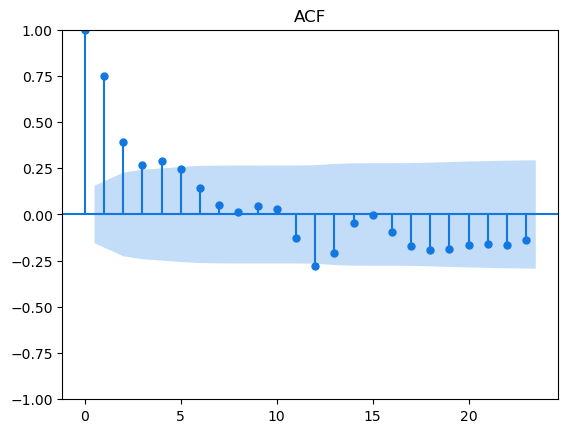

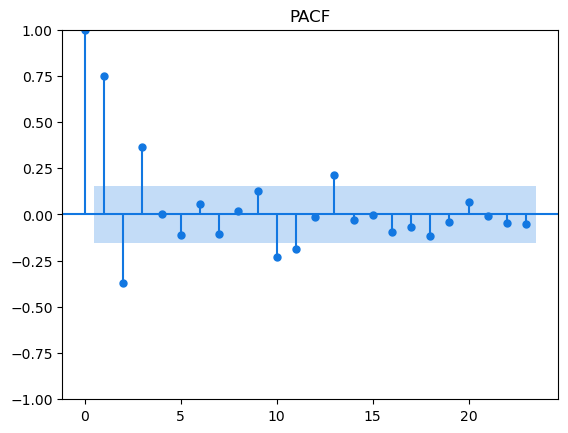

In [254]:
acf_plot = plot_acf(detrended_series, title="ACF")
pacf_plot = plot_pacf(detrended_series, title="PACF")

There is autocorrelation in the time series at several lags. Therefore, the time series is non-random.There is also significant partial correlations which further continues to support that the series is not random

## 6.MODELING

#### Time Series Modelling
There is seasonality in the data, so the best model to use is one that also caters for seasonality-SARIMAX

In [255]:
#using auto_arima- it does a random search for the best pdq,PDQS  
sarima_model = pm.auto_arima(series_2, 
                             m=12,
                             seasonal=True,
                             start_p=0,
                             start_q=0,
                             start_P=0,
                             start_Q=0,
                             max_order=6, 
                             test='adf',
                             error_action='warn',  
                             suppress_warnings=True,
                              stepwise=True,
                              trace=False)

* When evaluating and comparing statistical models fitted with different parameters, each can be ranked against one another based on how well it fits the data or its ability to accurately predict future data points
 
* The Akaike Information Criterion (AIC) tests the goodness of fit.It rewards models that achieve a high goodness-of-fit with little complexity
* A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit. 
* Auto_arima does a random search and comes up with the best parameters(from the given ones) that reduce the AIC.

In [256]:
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  172
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2362.843
Date:                Thu, 11 Apr 2024   AIC                           4727.686
Time:                        23:44:53   BIC                           4730.827
Sample:                    01-01-2004   HQIC                          4728.960
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.847e+10   4.11e+09     14.227      0.000    5.04e+10    6.65e+10
===================================================================================
Ljung-Box (L1) (Q):                 115.63   Jarque-Bera (JB):               107.01
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                            -1.12
Prob(H) (two-sided):                  0.09   Kurtosis:                         6.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

* This model has a high AIC. look for other values of pdq and s that might lower it

In [257]:
# Define the p, d and q parameters to take any value between 0 and 2

p = d = q = range(0,2)

# Generate all different combinations of p, d , q and s
pdq = list(itertools.product(p, d, q))
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [258]:
series_2.index = pd.date_range(start=series_2.index[0], periods=len(series_2), freq='MS')
#output = model.fit(maxiter=200)

ans = []
for comb in pdq:    
    for combs in pdqs:
        try:
            model = sm.tsa.statespace.SARIMAX(series_2,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            output = model.fit()
            ans.append([comb, combs, output.aic])
           
        except:
            continue

In [259]:
ans_df = pd.DataFrame(ans, columns=['pdq','pdqs', 'aic'])
ans_df.head()

,pdq,pdqs,aic
0,"(0, 0, 0)","(0, 0, 0, 12)",6096.685367
1,"(0, 0, 0)","(0, 0, 1, 12)",5578.689667
2,"(0, 0, 0)","(0, 1, 0, 12)",4998.793561
3,"(0, 0, 0)","(0, 1, 1, 12)",402996.287741
4,"(0, 0, 0)","(1, 0, 0, 12)",5018.846166


In [260]:
ans_df.loc[ans_df['aic'].idxmin()]


pdq         (1, 1, 1)
pdqs    (1, 1, 1, 12)
aic       3886.240262
Name: 63, dtype: object

* There was an improvement in aic, so we use the order parameters pdq and pdqs shown above

In [261]:
my_model = sm.tsa.statespace.SARIMAX(series_2,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = my_model.fit()

print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                  median_houseprice   No. Observations:                  172
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1938.120
Date:                            Thu, 11 Apr 2024   AIC                           3886.240
Time:                                    23:45:11   BIC                           3901.124
Sample:                                01-01-2004   HQIC                          3892.288
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7121      0.059     12.032      0.000       0.596       0.828
ma.L1          0.2567      0.024   

* The aic has improved.  check the distribution of residuals for this model

## 6.1 Model Diagnostics

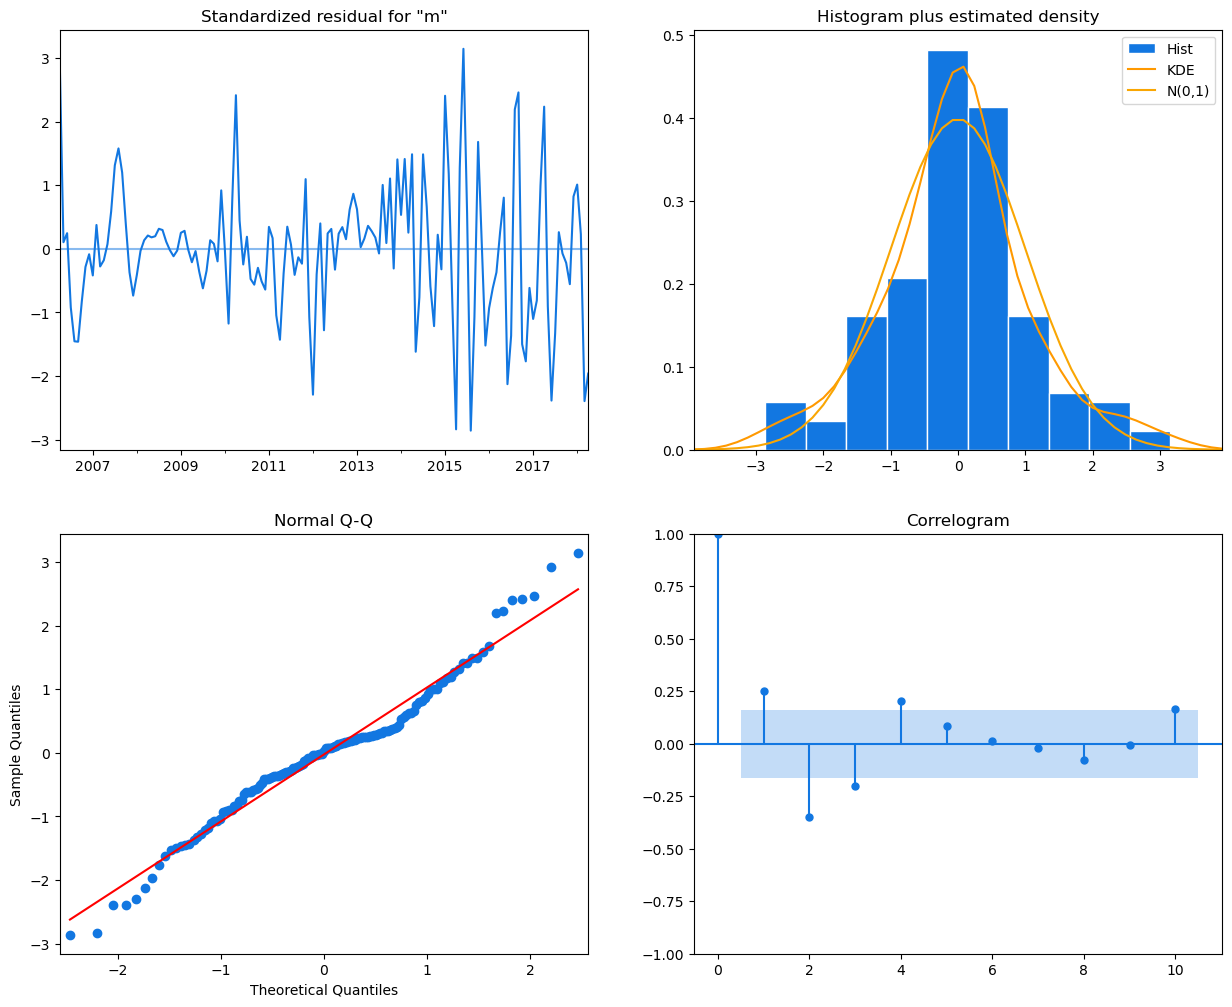

In [262]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

The image showcases four diagnostic plots for evaluating the fit of a time series model. 


* Standardized Residuals: presents standardized residuals over time, which ideally should scatter randomly around zero, indicating no systematic errors in the model. 


* Histogram and kernel density estimation plot: juxtaposed with a normal distribution curve, assesses the normality of the residuals, which is key to many statistical models. 


* Quantile-quantile plot: further examines this normality assumption by comparing the distribution of residuals against a theoretical normal distribution, with deviations indicating potential issues with normality, particularly at the distribution tails.


* Correlogram  illustrates the autocorrelation of residuals across different lags, where a lack of significant autocorrelation is desired, suggesting that the model is capturing the patterns in the data without leaving much structure in the residuals. Together, these plots are crucial for validating the assumptions underlying the statistical model in question.


 There is still correlation in  the residuals(shown by Correlogram) thus the model can be improved 

In [263]:
my_model2 = sm.tsa.statespace.SARIMAX(series_2,
                                order=(3, 1, 3),
                                seasonal_order=(3, 1, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results2 = my_model2.fit()

print(results2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                  median_houseprice   No. Observations:                  172
Model:             SARIMAX(3, 1, 3)x(3, 1, 3, 12)   Log Likelihood               -1552.148
Date:                            Thu, 11 Apr 2024   AIC                           3130.295
Time:                                    23:45:23   BIC                           3166.424
Sample:                                01-01-2004   HQIC                          3144.966
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8930      0.225      3.968      0.000       0.452       1.334
ar.L2         -0.2757      0.230   

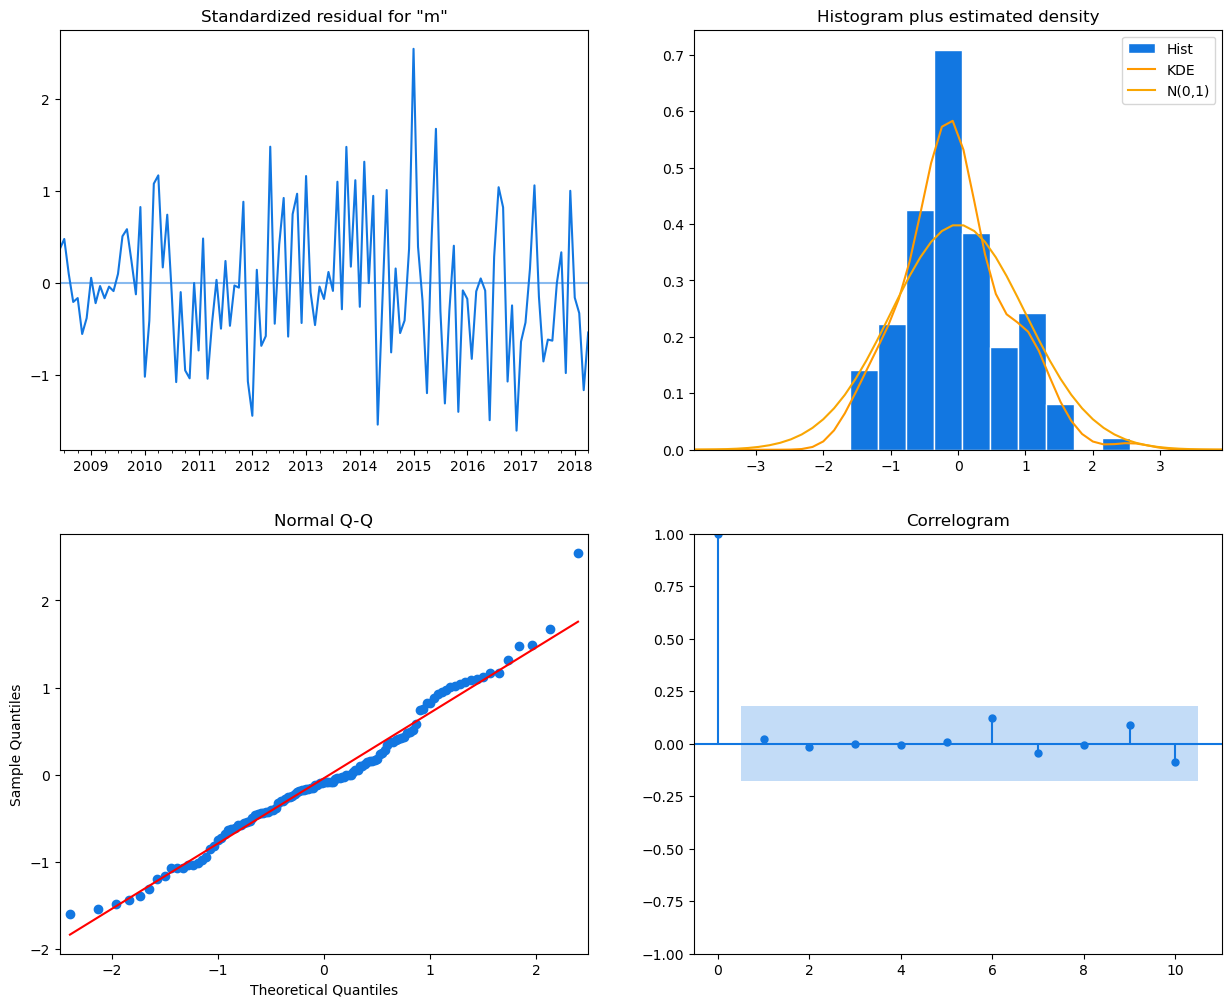

In [264]:
results2.plot_diagnostics(figsize=(15, 12))
plt.show()

There is observed improvement in this new model. The AIC is lower, there is no correlation in the residuals and the Q-Q plot shows the residuals have been taken from a N(0,1). Also the histogram shows the distribution of the residuals with a mean of 0. Being the best model, hence maintained.

## 7.EVALUATION

Compare predicted values to real values of the time series, to help us understand the accuracy of the forecasts

### a)Dynamic forecast
Uses in-sample prediction.The model sequentially predicts one-step-ahead using the true value from previous time step instead of using predicted value.

In [265]:
pred = results2.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)

pred_ci = pred.conf_int() # this gives us the confidence interval for our forecasts

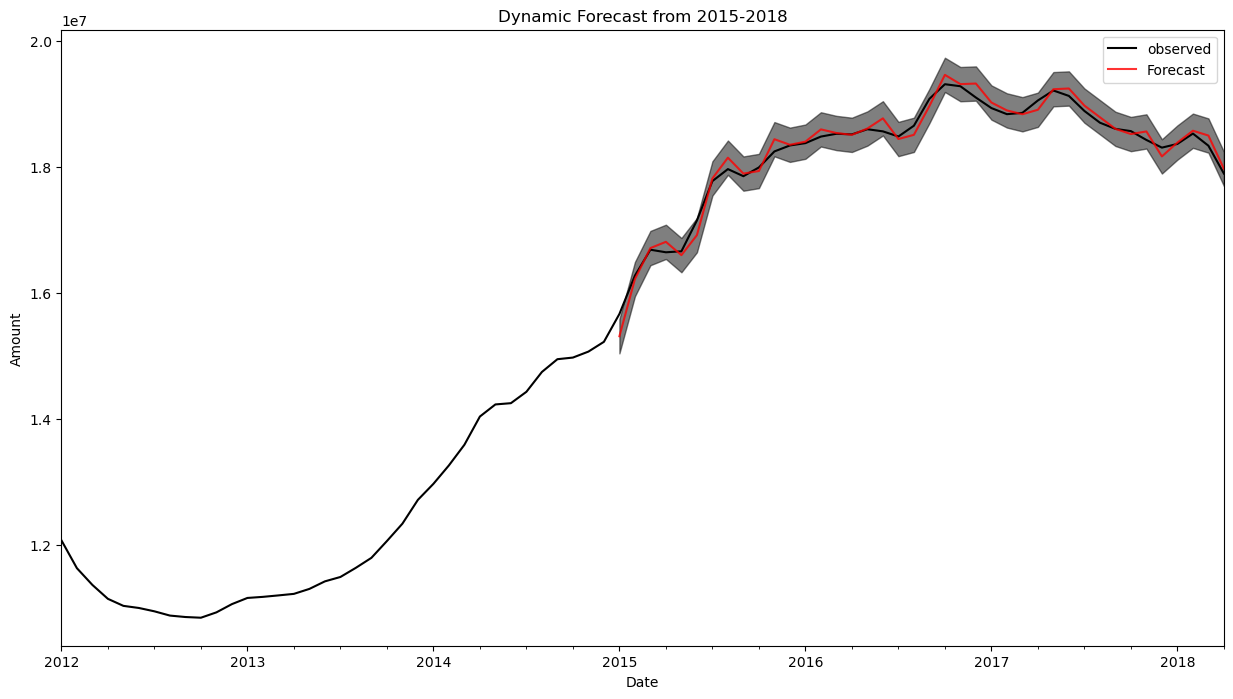

In [266]:
plt.figure(figsize = (15,8))
ax = series_2['2012':].plot(label='observed',color='black')
pred.predicted_mean.plot(ax=ax, label='Forecast', color='red',alpha=0.8)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=0.5)

ax.set_title('Dynamic Forecast from 2015-2018')
ax.set_xlabel('Date')
ax.set_ylabel('Amount')
plt.legend()

plt.show()

* Black Line (Observed): This line represents the actual observed values of the data set from 2012 to 2018. The data appears to be some type of cumulative quantity, such as sales, revenue, or another metric that accumulates over time, given its generally increasing trend.

* Red Line (Forecast): The red line indicates the forecasted values from the model starting from around 2015. This suggests that the model was likely trained on data from 2012 to the beginning of 2015, and from that point forward, it was used to predict future values.

* Grey Shaded Area: This area represents the confidence interval of the forecast, showing the range within which the actual values are expected to fall with a certain probability. The width of this shaded area indicates the level of uncertainty in the predictions: a wider area suggests greater uncertainty.

In [267]:
# evaluation
y_forecasted1 = pred.predicted_mean
y_truth1 = series_2['2015-01-01':]
mean_absolute_percentage_error(y_truth1, y_forecasted1)

0.005210916925129336

#### b) Non-Dynamic Forecast
uses out-of-sample prediction.The model continuously predicts one-step ahead (t+1) and then for the 2nd step ahead (t+2) prediction, it appends predicted value (t+1) to data, re-fits model on new expanded data then makes 2nd step ahead forecast.

In [268]:
pred_dynamic = results2.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=True)
pred_dynamic_ci = pred_dynamic.conf_int()

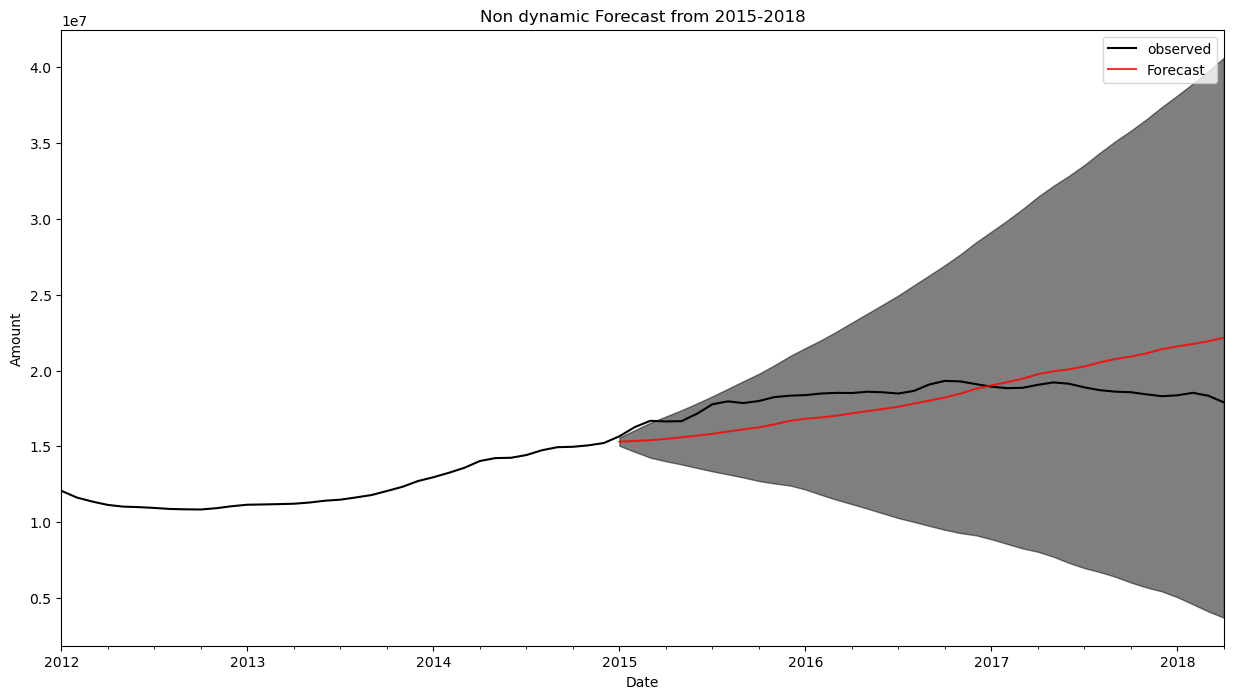

In [269]:
plt.figure(figsize = (15,8))
ax = series_2['2012':].plot(label='observed',color='black')
pred_dynamic.predicted_mean.plot(ax=ax, label='Forecast', color='red',alpha=0.8)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.5)

ax.set_title('Non dynamic Forecast from 2015-2018')
ax.set_xlabel('Date')
ax.set_ylabel('Amount')
plt.legend()

plt.show()

* Black Line (Observed): This line represents the observed data values from 2012 to 2018. The metric appears to grow significantly over time.

* Red Line (Forecast): The red line shows the forecasted values, presumably starting from 2015 as indicated in the title of the graph. The model that generated this forecast assumed that the conditions prevailing at the beginning of the forecast period would continue without change.

* Grey Shaded Area: This large grey area represents the confidence interval for the forecast, which shows the range of likely values for the forecast at different points in time. The interval widens as the forecast extends further into the future, indicating increasing uncertainty in the forecasted values as time goes on

In [270]:
# Evaluation
y_forecasted2 = pred_dynamic.predicted_mean
y_truth2 = series_2['2015-01-01':]
mean_absolute_percentage_error(y_truth2, y_forecasted2)

0.08461162244442985

## Future prediction

In [271]:
pred_uc = results2.get_forecast(steps=36)#prediction 3 years into the future

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

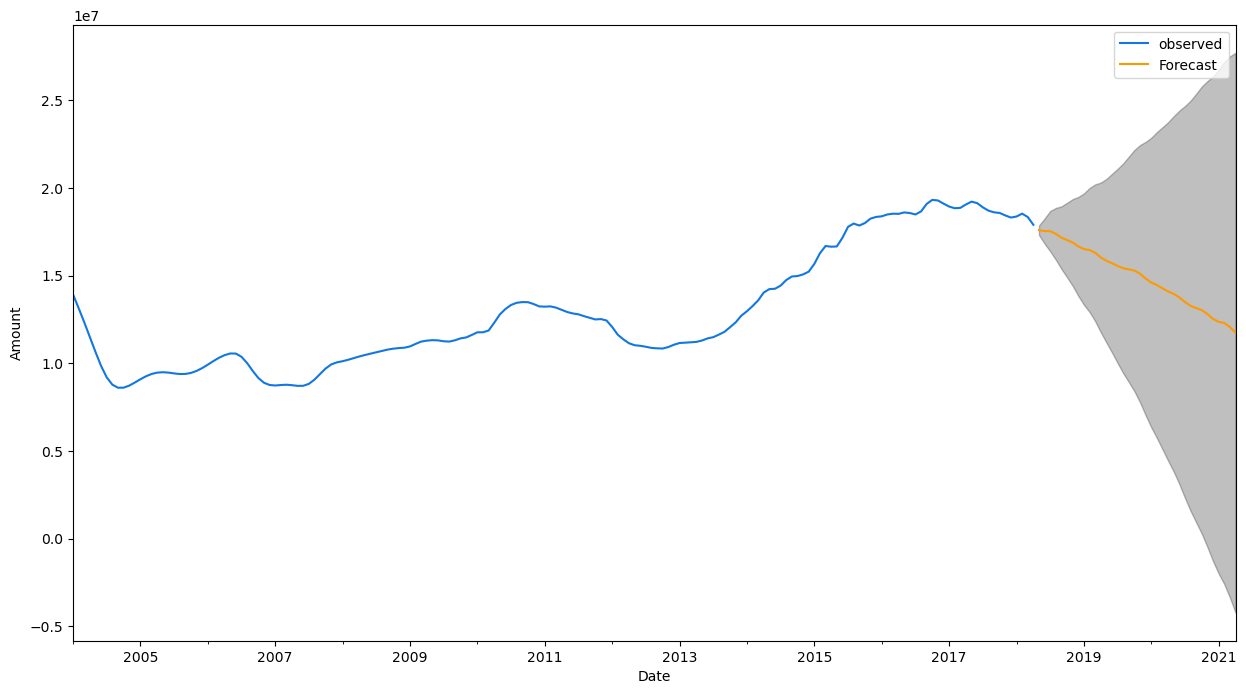

In [272]:
ax = series_2.plot(label='observed', figsize=(15, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Amount')

plt.legend()
plt.show()

* Blue line: represents the observed data, showing the actual recorded values of a certain variable, such as sales, stock prices, or another measurable quantity. The graph indicates that the data has seasonal fluctuations and an overall increasing trend over time.

* Orange line: marks the start of the forecast period, which begins around the end of 2017. This forecast line represents the predicted future values based on the historical data. It is plotted to estimate the trajectory of the observed data into the future.

* Grey shaded area: represents the confidence interval of the forecast, suggesting the degree of uncertainty associated with the predictions. It shows that as the forecast extends further into the future, the range of possible outcomes widens significantly, indicating greater uncertainty in the longer-term predictions.


Our seasonal arima shows a drop in price in the coming years. Lets see the trend with an fbprophet model

### fbprophet Model

In [273]:
series_p = z_df.copy()
series_p = series_p[series_p.Zipcode=='10021']
series_p

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,ROI,Percentage_ROI,CV,median_houseprice
Date,,,,,,,,,,,
1996-04-01,61635,10021,New York,NY,New York,New York,273,101.962601,10196.260069,0.781809,173800.0
1996-05-01,61635,10021,New York,NY,New York,New York,273,101.962601,10196.260069,0.781809,173850.0
1996-06-01,61635,10021,New York,NY,New York,New York,273,101.962601,10196.260069,0.781809,173850.0
1996-07-01,61635,10021,New York,NY,New York,New York,273,101.962601,10196.260069,0.781809,173850.0
1996-08-01,61635,10021,New York,NY,New York,New York,273,101.962601,10196.260069,0.781809,173900.0
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,61635,10021,New York,NY,New York,New York,273,101.962601,10196.260069,0.781809,18307100.0
2018-01-01,61635,10021,New York,NY,New York,New York,273,101.962601,10196.260069,0.781809,18365900.0
2018-02-01,61635,10021,New York,NY,New York,New York,273,101.962601,10196.260069,0.781809,18530400.0


In [274]:
series_p['Date'] = series_p.index
series_p

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,ROI,Percentage_ROI,CV,median_houseprice,Date
Date,,,,,,,,,,,,
1996-04-01,61635,10021,New York,NY,New York,New York,273,101.962601,10196.260069,0.781809,173800.0,1996-04-01
1996-05-01,61635,10021,New York,NY,New York,New York,273,101.962601,10196.260069,0.781809,173850.0,1996-05-01
1996-06-01,61635,10021,New York,NY,New York,New York,273,101.962601,10196.260069,0.781809,173850.0,1996-06-01
1996-07-01,61635,10021,New York,NY,New York,New York,273,101.962601,10196.260069,0.781809,173850.0,1996-07-01
1996-08-01,61635,10021,New York,NY,New York,New York,273,101.962601,10196.260069,0.781809,173900.0,1996-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,61635,10021,New York,NY,New York,New York,273,101.962601,10196.260069,0.781809,18307100.0,2017-12-01
2018-01-01,61635,10021,New York,NY,New York,New York,273,101.962601,10196.260069,0.781809,18365900.0,2018-01-01
2018-02-01,61635,10021,New York,NY,New York,New York,273,101.962601,10196.260069,0.781809,18530400.0,2018-02-01


In [275]:
series_p = series_p[['Date','median_houseprice']]
series_p = series_p.reset_index(drop=True)

In [276]:
series_p.head()

,Date,median_houseprice
0,1996-04-01,173800.0
1,1996-05-01,173850.0
2,1996-06-01,173850.0
3,1996-07-01,173850.0
4,1996-08-01,173900.0


In [277]:
#data from 2004
series_p = series_p[series_p.Date >='2004-01-01']
series_p.columns = ['ds','y']
series_p.head()

,ds,y
93,2004-01-01,13922800.0
94,2004-02-01,13140500.0
95,2004-03-01,12333800.0
96,2004-04-01,11490700.0
97,2004-05-01,10641200.0


In [278]:
m= Prophet()
m.fit(series_p)

23:45:26 - cmdstanpy - INFO - Chain [1] start processing
23:45:26 - cmdstanpy - INFO - Chain [1] done processing


In [279]:
#making predictions
future_dates = m.make_future_dataframe(periods=36,freq='MS')
forecast = m.predict(future_dates)

forecasted_data=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecasted_data

,ds,yhat,yhat_lower,yhat_upper
0,2004-01-01,1.014721e+07,8.729704e+06,1.155194e+07
1,2004-02-01,1.012583e+07,8.661898e+06,1.159641e+07
2,2004-03-01,1.009959e+07,8.797727e+06,1.162127e+07
3,2004-04-01,9.807134e+06,8.458263e+06,1.121756e+07
4,2004-05-01,9.708981e+06,8.202055e+06,1.109076e+07
...,...,...,...,...
203,2020-12-01,2.418889e+07,2.272813e+07,2.563955e+07
204,2021-01-01,2.408773e+07,2.268359e+07,2.562703e+07
205,2021-02-01,2.418180e+07,2.273706e+07,2.570224e+07
206,2021-03-01,2.478232e+07,2.332913e+07,2.628952e+07


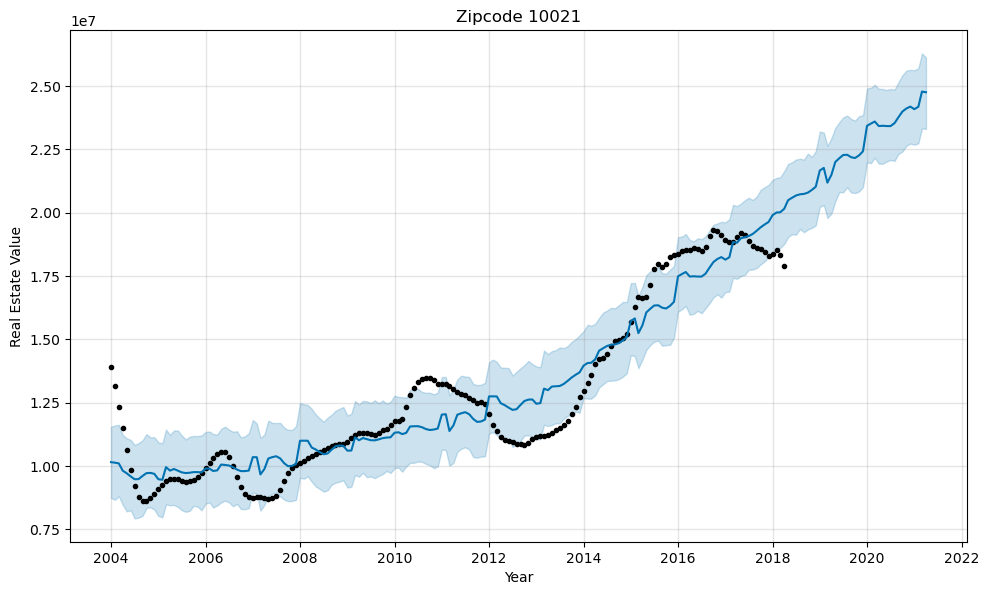

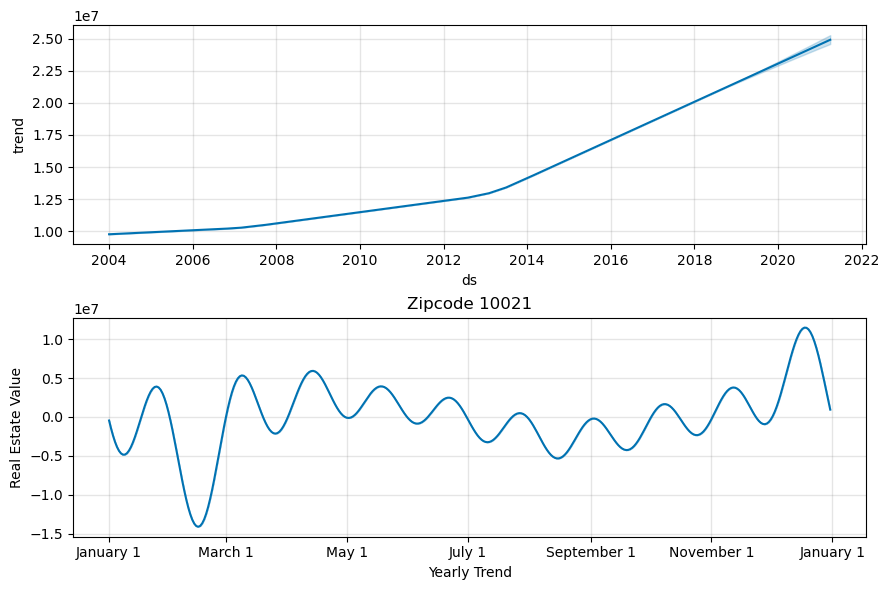

In [280]:
m.plot(forecast, uncertainty=True)
plt.title('Zipcode 10021')
plt.ylabel('Real Estate Value')
plt.xlabel('Year')
m.plot_components(forecast)
plt.title('Zipcode 10021')
plt.ylabel('Real Estate Value')
plt.xlabel('Yearly Trend');

Series Graph

* Black Dots: These points likely represent actual observed real estate values at different points in time. They could be based on individual sales, assessments, or aggregate market data for the given zipcode.

* Solid Blue Line: This line seems to be a trend line that smooths out the fluctuations in the observed data to show the underlying trend in property values over time.

* Blue Shaded Area: The shaded area around the trend line represents the confidence interval, which provides an estimate of the uncertainty around the trend line. The width of this shaded area indicates the level of confidence we have in the trend line at different points in time; a wider area suggests greater uncertainty. It's not unusual to see this area widen as the forecast extends into the future, which is depicted on the right side of the graph.




Top Graph (Trend): This graph displays a long-term trend in the data from 2004 to 2022. The y-axis is labeled as "Trend," and the x-axis is labeled "ds," which often stands for date stamp in time series analysis. The upward trajectory of the line suggests a consistent increase over time in the data being measured, which is the real estate values in Zipcode 10021.

Bottom Graph (Seasonal): The lower graph shows the seasonal fluctuations within a single year, labeled as "Yearly Trend" along the x-axis, which spans from January 1 to January 1 of the next year, completing a full cycle. This graph illustrates the periodic ups and downs that repeat at regular intervals throughout the year. The y-axis is labeled "Real Estate Value," indicating the variation in value that can be attributed to seasonal patterns.

In [281]:
# Evaluating the prophet model
y_true = series_2['2015-01-01':]
pred1 = forecasted_data[forecasted_data['ds']>='2015-01-01']
y_pred = pred1[pred1['ds']<='2018-04-01']['yhat']
mape = mean_absolute_percentage_error(y_true, y_pred)
mape

0.05599826304481601

## 8.CONCLUSION

*Conclusion:*

The Zillow dataset is highly suitable for addressing the real-world problem of identifying the best zip codes for real estate investment. Its comprehensive coverage of historical home values across a wide range of geographical locations, coupled with its temporal depth, provides a robust foundation for conducting time series analysis. By carefully addressing the dataset's limitations, this project can leverage the data to generate valuable insights for the stakeholder, guiding investment decisions in the dynamic real estate market.

* There is a difference in the forecast between our model and the prophet model
* The prophet model has a higher MAPE than the dynamic model,confidently go with the SARIMAX model.
* In future analysis, there is need to do analysis of the different zipcodes to be able to answer the investors question, as with this specific zipcode used, highly discourage the investor to invest there at the moment
* There is need to split the data into train and test set and redo the analysis with this data.

*Limitations and Implications:*

- *Historical Data Only*: The dataset does not include future or real-time data, limiting the analysis to historical trends and necessitating assumptions about future market behavior.
- *Lack of External Factors*: External economic indicators, such as interest rates, employment rates, and GDP growth, which can significantly influence real estate prices, are not included. This absence might limit the comprehensiveness of the forecast.
- *Missing Values*: Any missing data, especially in the early years, could affect the analysis's accuracy. Careful preprocessing and imputation strategies will be required to mitigate this.

*Next Steps*

Real-Time Monitoring and Updating: Establish a framework for real-time monitoring of relevant market indicators and updating the forecasting models accordingly. This will enable the investment firm to adapt quickly to changing market conditions and make timely investment decisions.

Incorporate External Factors: Integrate external economic indicators such as interest rates, employment rates, and GDP growth into the analysis to provide a more comprehensive understanding of the real estate market dynamics. This could involve obtaining relevant datasets and merging them with the existing Zillow dataset for enhanced forecasting accuracy.

Validation and Sensitivity Analysis: Conduct thorough validation and sensitivity analyses to assess the robustness of the model outputs. This involves testing the models against different scenarios, adjusting key parameters, and examining the stability of results to ensure the reliability of investment recommendations.